<a href="https://colab.research.google.com/github/nikunjchapadia/fastbook/blob/master/tabular_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  

In [ ]:
# Dataset with Continues and Categoorical Variables 

In [7]:
# # Vast majority of datasets can be best modeled with just two methods 
# 1. Ensembles of decision tree - 
# i.e. Random Forests and Graident Boosting Machines
# mainly for strectured data 

# 2. Multi layered neural networks learnt with SGD - 
# i.e. shallow and deep learning 
# mainly for unstructured data such as audio, vision, natural language 



In [8]:
# pytorch is not good choice for ensembles of decision tree 
# pytorch and fastai mainly designed for algorithms that do lots of 
# matrix multiplication & derivatives - deep learing 
# decision trees doesnt depends on matrix multiplcations and derivatives 


# whats the solution?
# sklearn - its good for machine learning models using approaches not covered
# by deep learning 
# for tabular data processing and quering - pandas 
# numpy - numeric programming libarary 

In [10]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [11]:
creds = '{"username":"nikunjchapadia","key":"6b480094b7b76a4eebfe3738184224c7"}'

In [12]:
!pip install kaggle

In [13]:
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [14]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
  cred_path.parent.mkdir(exist_ok=True)
  cred_path.write_text(creds)
  cred_path.chmod(0o600)

In [15]:
path = URLs.path('bluebook')
path

Path('/root/.fastai/archive/bluebook')

In [16]:
from kaggle import api

In [18]:
import shutil
if not path.exists():
    path.mkdir(parents=true)
    api.competition_download_cli('bluebook-for-bulldozers', path=path)
    # file_extract(path/'bluebook-for-bulldozers.zip')
    # !unzip /root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip -d /root/.fastai/archive/bluebook
    shutil.unpack_archive('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip', '/root/.fastai/archive/bluebook')

In [19]:
path.ls(file_type='text')

(#7) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/ValidSolution.csv'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/root/.fastai/archive/bluebook/Test.csv'),Path('/root/.fastai/archive/bluebook/Valid.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv')]

In [20]:
path

Path('/root/.fastai/archive/bluebook')

In [21]:
path.ls()

(#15) [Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip'),Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/ValidSolution.csv'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/root/.fastai/archive/bluebook/Test.csv'),Path('/root/.fastai/archive/bluebook/Valid.7z'),Path('/root/.fastai/archive/bluebook/Valid.zip'),Path('/root/.fastai/archive/bluebook/Valid.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv')...]

In [22]:
temp_path = Path('/root/.fastai/archive/bluebook')
temp_path.ls()

(#15) [Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip'),Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/ValidSolution.csv'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/root/.fastai/archive/bluebook/Test.csv'),Path('/root/.fastai/archive/bluebook/Valid.7z'),Path('/root/.fastai/archive/bluebook/Valid.zip'),Path('/root/.fastai/archive/bluebook/Valid.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv')...]

In [23]:
import shutil

In [24]:
shutil.unpack_archive('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip', '/root/.fastai/archive/bluebook')

In [25]:
Path('/root/.fastai/archive/bluebook').ls()


(#15) [Path('/root/.fastai/archive/bluebook/bluebook-for-bulldozers.zip'),Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/ValidSolution.csv'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/root/.fastai/archive/bluebook/Test.csv'),Path('/root/.fastai/archive/bluebook/Valid.7z'),Path('/root/.fastai/archive/bluebook/Valid.zip'),Path('/root/.fastai/archive/bluebook/Valid.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv')...]

In [26]:
Path('/root/.fastai/archive/bluebook').ls(file_type="text")

(#7) [Path('/root/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/root/.fastai/archive/bluebook/median_benchmark.csv'),Path('/root/.fastai/archive/bluebook/ValidSolution.csv'),Path('/root/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/root/.fastai/archive/bluebook/Test.csv'),Path('/root/.fastai/archive/bluebook/Valid.csv'),Path('/root/.fastai/archive/bluebook/TrainAndValid.csv')]

In [27]:
# !pip install kaggle


In [28]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [29]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [30]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [31]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'

In [32]:
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

In [33]:
dep_var = 'SalePrice'

In [34]:
df[dep_var] = np.log(df[dep_var])

In [35]:
df[dep_var]

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
412693     9.210340
412694     9.259131
412695     9.433484
412696     9.210340
412697     9.472705
Name: SalePrice, Length: 412698, dtype: float64

In [36]:
np.log(df[dep_var])

0         2.406712
1         2.393413
2         2.220327
3         2.356923
4         2.230622
            ...   
412693    2.220327
412694    2.225610
412695    2.244265
412696    2.220327
412697    2.248414
Name: SalePrice, Length: 412698, dtype: float64

In [37]:
11.097410, np.log(11.097410)

(11.09741, 2.4067117477584974)

In [38]:
# Decision Trees

In [39]:
df = add_datepart(df, 'saledate')

In [40]:
df_test = pd.read_csv(path/'Test.csv', low_memory=False)
df_test = add_datepart(df_test, 'saledate')

In [41]:
' '.join(o for o in df.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [42]:
# Using TabularPandas and TabularProc
procs = [Categorify, FillMissing]

In [43]:
cond = (df.saleYear < 2011) | (df.saleMonth < 11)
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx), list(valid_idx))
train_idx, valid_idx

(array([     0,      1,      2, ..., 412695, 412696, 412697]),
 array([ 23216,  23217,  23218, ..., 401120, 401121, 401122]))

In [44]:
# categorical and continues variables
cont, cat = cont_cat_split(df, 1, dep_var=dep_var)

In [45]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [46]:
len(to.train)

406944

In [47]:
len(to.valid)

5754

In [48]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [49]:
to1 =  TabularPandas(
     df,
     procs,
    ['state', 'ProductGroup', 'Drive_System', 'Enclosure'],
    [],
    y_names=dep_var,
    splits=splits
    )
to1.show(3)

,state,ProductGroup,Drive_System,Enclosure,SalePrice
0,Alabama,WL,#na#,EROPS w AC,11.097410
1,North Carolina,WL,#na#,EROPS w AC,10.950807
2,New York,SSL,#na#,OROPS,9.210340


In [50]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1


In [51]:
to1.items[['state', 'ProductGroup', 'Drive_System', 'Enclosure']].head(3)

,state,ProductGroup,Drive_System,Enclosure
0,1,6,0,3
1,33,6,0,3
2,32,3,0,6


In [52]:
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

In [53]:
path

Path('/root/.fastai/archive/bluebook')

In [54]:
save_pickle(path/'to.pkl',to)

In [55]:
# create decision tree
to = load_pickle(path/'to.pkl')

In [56]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [57]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

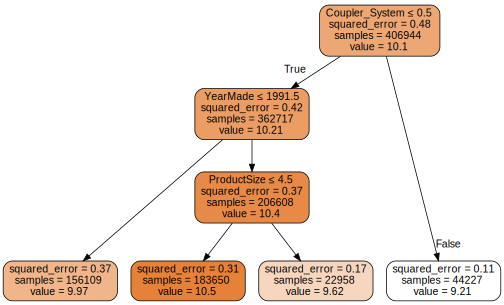

In [58]:
draw_tree(m,xs,size=7, leaves_parallel=True, precision=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
findfont: Font family ['DejaVu Sas'] not found. Falling back to DejaVu Sans.


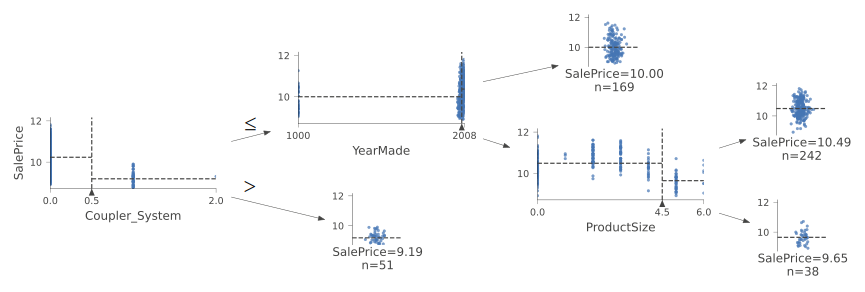

In [59]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var, fontname='DejaVu Sas', scale=1.6, label_fontsize=10, orientation='LR')

In [60]:
xs.loc[xs['YearMade'] < 1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade'] < 1900, 'YearMade'] = 1950

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


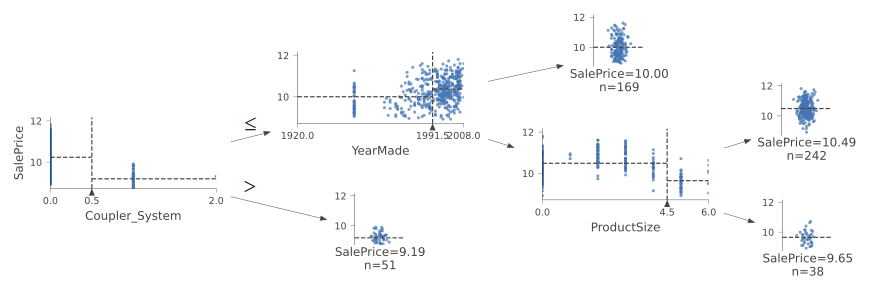

In [61]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs,y)

dtreeviz(
    m,
    xs.iloc[samp_idx],
    y.iloc[samp_idx],
    xs.columns,
    dep_var,
    fontname='DejaVu Sans',
    scale=1.6,
    label_fontsize=10,
    orientation='LR')

In [62]:
m = DecisionTreeRegressor().fit(xs,y)

In [63]:
# root mean square error 
# model's root mean square error

def r_mse(pred, y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs,y): return r_mse(m.predict(xs), y)

In [64]:
m_rmse(m, xs, y)

0.0

In [65]:
m_rmse(m, valid_xs, valid_y)

0.336451

In [66]:
# seems like overfitting 
m.get_n_leaves(), len(xs)

(326318, 406944)

In [67]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m,xs, y), m_rmse(m, valid_xs, valid_y)

(0.248954, 0.325631)

In [68]:
m.get_n_leaves()

12469

In [69]:
# Random forests 
# Bagging predictors 

# bootstrep replicats - take subset of your data and train on it and store it as onne of predictor
# average all predictors 

def rf(xs, y, 
       n_estimators=40,
       max_samples=200_000,
       max_features=0.5,
       min_samples_leaf=5,
       **kwargs):
  return RandomForestRegressor(
      n_jobs=-1, # it will use all available cpu cores
      n_estimators=n_estimators, # how many models to train 
      max_samples=max_samples, # how many reandomly choosen raws to use
      max_features=max_features, # how many reandomly choosen columns to use 
      min_samples_leaf=min_samples_leaf,
      oob_score=True).fit(xs,y)

In [70]:
m= rf(xs, y)

In [71]:
m_rmse(m,xs, y), m_rmse(m, valid_xs, valid_y)

(0.170927, 0.233973)

In [72]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

In [73]:
r_mse(preds.mean(0), valid_y)

0.233973

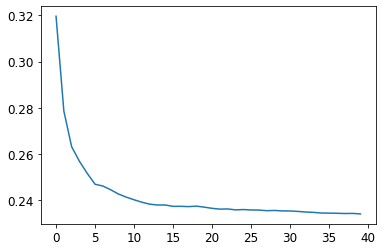

In [74]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)])

In [75]:
# why validiation set is not doing well
# out of bag error
# look at each row of training set, which trees  
r_mse(m.oob_prediction_, y)

0.21048

In [76]:
# Model interpretation 
# tree variance for prediction confidence 
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

In [77]:
preds.shape

(40, 5754)

In [78]:
preds_std = preds.std(0)
preds_std

array([0.26930412, 0.18024792, 0.22930042, ..., 0.20765718, 0.20765718, 0.20516212])

In [79]:
preds_std[:5]

array([0.26930412, 0.18024792, 0.22930042, 0.19696967, 0.2017145 ])

In [80]:
 # feature importance
 def rf_feat_importance(m, df):
   return pd.DataFrame({
       'cols':df.columns,
      'imp':m.feature_importances_,
      }).sort_values('imp', ascending=False)

In [81]:
fi = rf_feat_importance(m,xs)
fi[:10]

,cols,imp
57,YearMade,0.178495
6,ProductSize,0.123583
30,Coupler_System,0.087504
7,fiProductClassDesc,0.070781
31,Grouser_Tracks,0.056418
54,ModelID,0.055078
32,Hydraulics_Flow,0.053282
65,saleElapsed,0.051084
3,fiSecondaryDesc,0.049308
1,fiModelDesc,0.032847


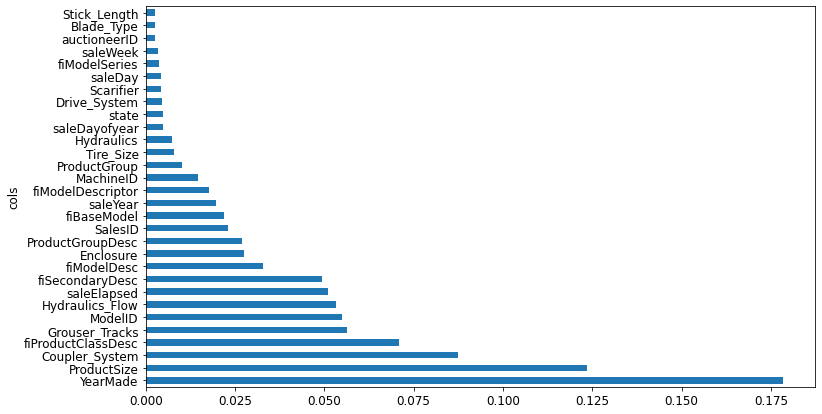

In [82]:
from matplotlib.pyplot import legend
from IPython.core.pylabtools import figsize
def plot_fi(fi):
  return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30])  

In [83]:
# removing low importance variables 
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

20

In [84]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [85]:
m = rf(xs_imp, y)

In [86]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.181734, 0.233765)

In [87]:
len(xs.columns), len(xs_imp.columns)

(66, 20)

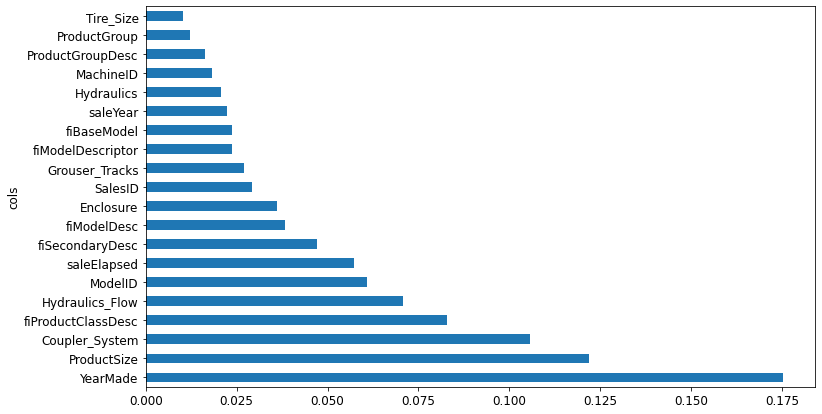

In [88]:
plot_fi(rf_feat_importance(m, xs_imp))

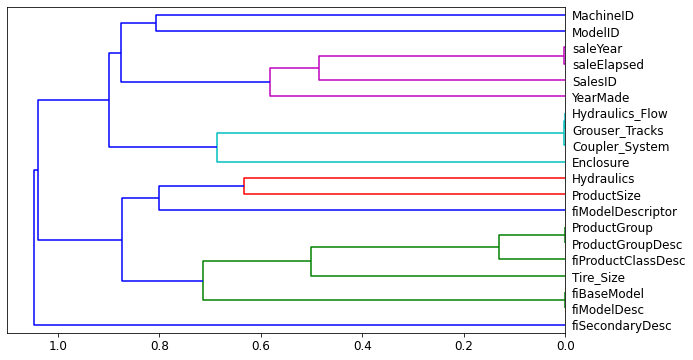

In [89]:
# removing redundant features 
cluster_columns(xs_imp)

In [90]:
def get_oob(df):
  m = RandomForestRegressor(
      n_estimators=40,
      min_samples_leaf=15, 
      max_samples=50000,
      max_features=0.5, 
      n_jobs=-1,
      oob_score=True
      )
  m.fit(df, y)
  return m.oob_score_

In [91]:
get_oob(xs_imp)
# higher the number its better

0.8765414461756662

In [92]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc','ProductGroup',
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}


{'Coupler_System': 0.8762437656201196,
 'Grouser_Tracks': 0.8762444691333852,
 'Hydraulics_Flow': 0.875958065652813,
 'ProductGroup': 0.8766223520093825,
 'ProductGroupDesc': 0.8759582739120282,
 'fiBaseModel': 0.875360656766652,
 'fiModelDesc': 0.8746440235326827,
 'saleElapsed': 0.8715588558601464,
 'saleYear': 0.8758821127913925}

In [93]:
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.874313907114493

In [94]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [95]:
save_pickle(path/'xs_final.pkl', xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)

In [96]:
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

In [97]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.183351, 0.233749)

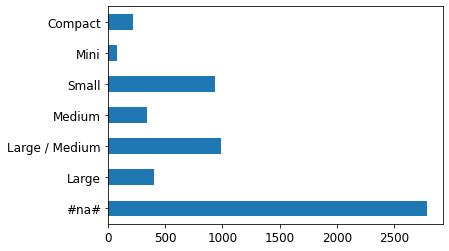

In [98]:
# Partial dependence 
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

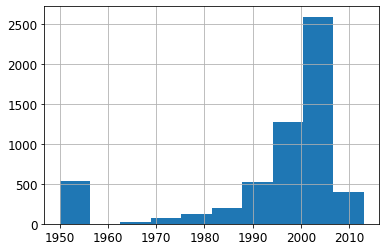

In [99]:
ax = valid_xs_final['YearMade'].hist()

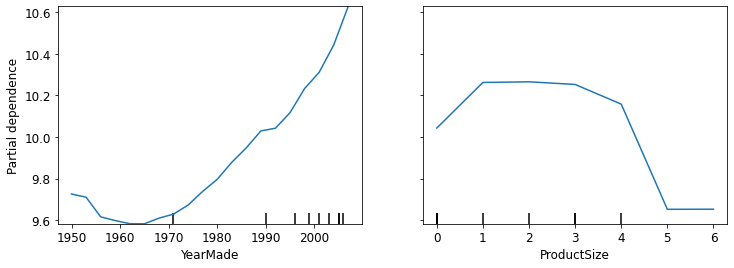

In [100]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['YearMade','ProductSize'],
                        grid_resolution=20, ax=ax);

In [101]:
!pip install treeinterpreter
!pip install waterfallcharts

In [102]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [103]:
row = valid_xs_final.iloc[:5]

In [104]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [105]:
prediction[0], bias[0], contributions[0].sum()

(array([10.64496546]), 10.104331833430766, 0.5406336264455849)

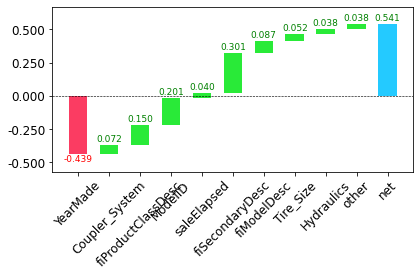

In [106]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

In [107]:
np.random.seed(42)

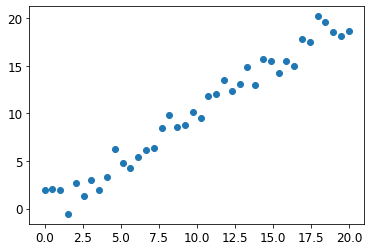

In [108]:
x_lin = torch.linspace(0,20, steps=40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin);

In [109]:
x_lin

tensor([ 0.0000,  0.5128,  1.0256,  1.5385,  2.0513,  2.5641,  3.0769,  3.5897,  4.1026,  4.6154,  5.1282,  5.6410,  6.1538,  6.6667,  7.1795,  7.6923,  8.2051,  8.7179,  9.2308,  9.7436, 10.2564,
        10.7692, 11.2821, 11.7949, 12.3077, 12.8205, 13.3333, 13.8462, 14.3590, 14.8718, 15.3846, 15.8974, 16.4103, 16.9231, 17.4359, 17.9487, 18.4615, 18.9744, 19.4872, 20.0000])

In [110]:
xs_lin = x_lin.unsqueeze(1)
x_lin.shape,xs_lin.shape

(torch.Size([40]), torch.Size([40, 1]))

In [111]:
m_lin = RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])

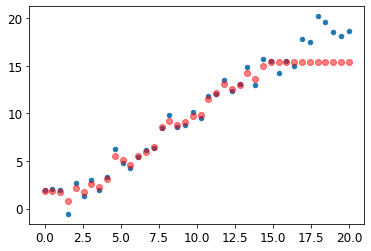

In [112]:
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color='red', alpha=0.5);

In [113]:
# Finding out domain data 
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
6,saleElapsed,0.905973
10,SalesID,0.080314
12,MachineID,0.010224
0,YearMade,0.000699
14,Tire_Size,0.000670
4,ModelID,0.000536


In [114]:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('SalesID','saleElapsed','MachineID'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.233846
SalesID 0.232054
saleElapsed 0.236744
MachineID 0.232777


In [115]:
time_vars = ['SalesID','MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.230554

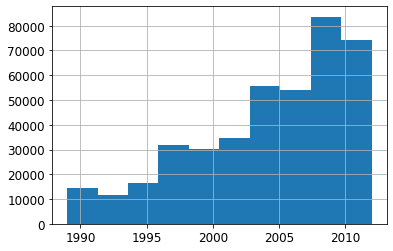

In [116]:
xs['saleYear'].hist();

In [117]:
filt = xs['saleYear']>2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]

In [118]:
m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.176929, 0.230691)

In [151]:
# Using a NN

df_nn = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

In [152]:
df_nn

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,...,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,...,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,...,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,...,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,...,False,False,False,1.248307e+09
...,...,...,...,...,...,...,...,...,...
412693,6333344,9.210340,1919201,21435,...,False,False,False,1.331078e+09
412694,6333345,9.259131,1882122,21436,...,False,False,False,1.327709e+09
412695,6333347,9.433484,1944213,21435,...,False,False,False,1.327709e+09
412696,6333348,9.210340,1794518,21435,...,False,False,False,1.331078e+09


In [162]:
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]  
df_nn_final.columns

Index(['YearMade', 'ProductSize', 'Coupler_System', 'fiProductClassDesc',
       'ModelID', 'Hydraulics_Flow', 'saleElapsed', 'fiSecondaryDesc',
       'fiModelDesc', 'Enclosure', 'fiModelDescriptor', 'ProductGroup',
       'Tire_Size', 'Hydraulics', 'SalePrice'],
      dtype='object')

In [159]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [160]:
cont_nn

['saleElapsed']

In [137]:
# cont_nn.append('saleElapsed') 

In [161]:
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
ModelID               5281
Hydraulics_Flow          3
fiSecondaryDesc        177
fiModelDesc           5059
Enclosure                6
fiModelDescriptor      140
ProductGroup             6
Tire_Size               17
Hydraulics              12
dtype: int64

In [148]:
# cat_nn.append('Drive_System')

In [158]:
cat_nn

['YearMade',
 'ProductSize',
 'Coupler_System',
 'fiProductClassDesc',
 'ModelID',
 'Hydraulics_Flow',
 'fiSecondaryDesc',
 'fiModelDesc',
 'Enclosure',
 'fiModelDescriptor',
 'ProductGroup',
 'Tire_Size',
 'Hydraulics']

In [163]:
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
ModelID               5281
Hydraulics_Flow          3
fiSecondaryDesc        177
fiModelDesc           5059
Enclosure                6
fiModelDescriptor      140
ProductGroup             6
Tire_Size               17
Hydraulics              12
dtype: int64

In [165]:
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.179169, 0.232301)

In [166]:
cat_nn.remove('fiModelDescriptor')

In [167]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [168]:
dls = to_nn.dataloaders(1024)

In [169]:
y = to_nn.train.y
y.min(),y.max()

(8.465899467468262, 11.863582611083984)

In [170]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.00015848931798245758)

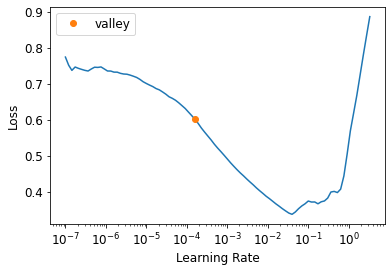

In [171]:
learn.lr_find()

In [172]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,0.065990,0.063020,00:50
1,0.053932,0.056522,00:33
2,0.048465,0.054552,00:33
3,0.044521,0.057896,00:33
4,0.040573,0.051718,00:33


In [173]:
preds, targs = learn.get_preds()
r_mse(preds, targs)

0.227416

In [175]:
# NN and RF - each has pro and cons 
# We want pros from both approach 
# Ensembling - Ensemble of RF and NN
rf_preds = m.predict(valid_xs_time) 
end_preds = (to_np(preds.squeeze()) + rf_preds) / 2

In [176]:
r_mse(end_preds, valid_y)

0.223822

In [ ]:
# Boosting 